# 3C454.3 analysis notebook

In [1]:
from agilepy.api.AGAnalysis import AGAnalysis

In [ ]:
# Interactive plots
%matplotlib widget

## Creating a configuration file

In [2]:
confFilePath = "$HOME/agilepy_conf.yaml"

In [3]:
AGAnalysis.getConfiguration(
    confFilePath = confFilePath,
    evtfile="$AGILE/agilepy-test-data/test_dataset_agn/EVT/EVT.index",
    logfile="$AGILE/agilepy-test-data/test_dataset_agn/LOG/LOG.index",
    userName = "bulgarelli",
    sourceName = "3C454d3b",
    tmin = 55513.0,
    tmax = 55520.0,
    timetype = "MJD",
    glon = 86.11,
    glat = -38.18,
    outputDir = "$HOME/agilepy_analysis",
    verboselvl = 1
)

## Obtaining the AGAnalysis object

In [4]:
ag = AGAnalysis(confFilePath)

2021-01-12 18:25:50,972 [INFO    ] [AgilepyLogger] File and Console loggers are active. Log file: /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/logs/analysis_log.log


## Sources hypothesis

In [5]:
sources = ag.loadSourcesFromCatalog("2AGL", rangeDist = (0, 5), show=True)

2021-01-12 18:26:00,187 [INFO    ] [SourcesLibrary] 
-----------------------------------------------------------
Source name: 2AGLJ2247+1558 (PointSource)
  * Position:
	- start_pos: (84.2229, -37.4782)
	- dist from (l,b): 1.6474
  * Spectrum: (PowerLaw)
	- flux: 6.05327e-08
	- index: 2.75651
  * Free params: none
-----------------------------------------------------------
2021-01-12 18:26:00,188 [INFO    ] [SourcesLibrary] 
-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: none
-----------------------------------------------------------
2021-01-12 18:26:00,189 [INFO    ] [SourcesLibrary] Loaded 2 sources. Total sources: 2


## Adding a source at runtime

In [6]:
#newSourceDict = {
#    "glon" : 79.3,
#    "glat": 0.554,
#    "spectrumType" : "PowerLaw",
#    "flux": 1.69737e-07,
#    "index": 2.1
#}

#s = ag.addSource("CYGX3", newSourceDict)

#print(s)

## Deleting sources
Selection params = [name, dist, flux, sqrtts]

In [7]:
deletedSources = ag.deleteSources('flux <= 10e-08', show = True)

2021-01-12 18:26:10,990 [INFO    ] [SourcesLibrary] 
-----------------------------------------------------------
Source name: 2AGLJ2247+1558 (PointSource)
  * Position:
	- start_pos: (84.2229, -37.4782)
	- dist from (l,b): 1.6474
  * Spectrum: (PowerLaw)
	- flux: 6.05327e-08
	- index: 2.75651
  * Free params: none
-----------------------------------------------------------
2021-01-12 18:26:10,991 [INFO    ] [SourcesLibrary] Deleted 1 sources.


## Selecting sources

In [8]:
sources = ag.selectSources("flux > 0", show = True)

2021-01-12 18:26:16,509 [INFO    ] [SourcesLibrary] 
-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: none
-----------------------------------------------------------


## Free a source's parameter
Freeable params = [flux, index, index1, index2, cutoffEnergy, pivotEnergy, curvature]

In [26]:
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "flux", True, show=True)
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "pos", True, show=True)

2021-01-13 12:06:01,767 [INFO    ] [SourcesLibrary] 
-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 19.5207
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.1
  * Free params: flux pos
  * Multi analysis:
	- flux(ph/cm2s): 7.50937e-07 +- 2.175e-320
	- upper limit(ph/cm2s): 2.45083e-05
	- ergLog(erg/cm2s): 1.21364e-10 +- 5e-324
	- galCoeff: [0.7]
	- isoCoeff: [10.2492]
	- exposure(cm2s): 23683500.0
	- exp-ratio: 0.0
	- L_peak: 86.1236
	- B_peak: -38.1824
	- distFromStartPos: 0.0
	- ellipse:
	    - L: -1.0
	    - B: -1.0
	    - distFromStartPos: -1.0
	    - r: -1.0
	    - a: -1.0
	    - b: -1.0
	    - phi: -1.0
-----------------------------------------------------------


In this example, only one source is affected.

## Update the value of a spectrum parameter of a source

In [10]:
sources = ag.selectSources('name == "2AGLJ2254+1609"')
source = sources.pop()
source.spectrum.set("index", 2.10)
print(source)


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.1
  * Free params: flux
-----------------------------------------------------------


## Analysis

In [11]:
#Generate maps
maplistfile = ag.generateMaps()

2021-01-12 18:26:52,206 [INFO    ] [CtsMapGenerator] Science tool called!
2021-01-12 18:26:53,369 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.cts.gz']
2021-01-12 18:26:53,371 [INFO    ] [ExpMapGenerator] Science tool called!
2021-01-12 18:27:07,583 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.exp.gz']
2021-01-12 18:27:07,585 [INFO    ] [GasMapGenerator] Science tool called!
2021-01-12 18:27:08,202 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.gas.gz']
2021-01-12 18:27:08,203 [INFO    ] [IntMapGenerator] Science tool called!
2021-01-12 18:27:08,303 [INFO    ] [AGAnalysis] Science too

In [12]:
! cat $maplistfile

/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.cts.gz /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.exp.gz /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.gas.gz 30 -1 -1


2021-01-12 18:27:35,797 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.
2021-01-12 18:27:35,798 [INFO    ] [PlottingUtils] The region catalog /Users/bulgarelli/opt/anaconda3/envs/agilepyenv/agiletools/catalogs/2AGL_2.reg will be loaded.


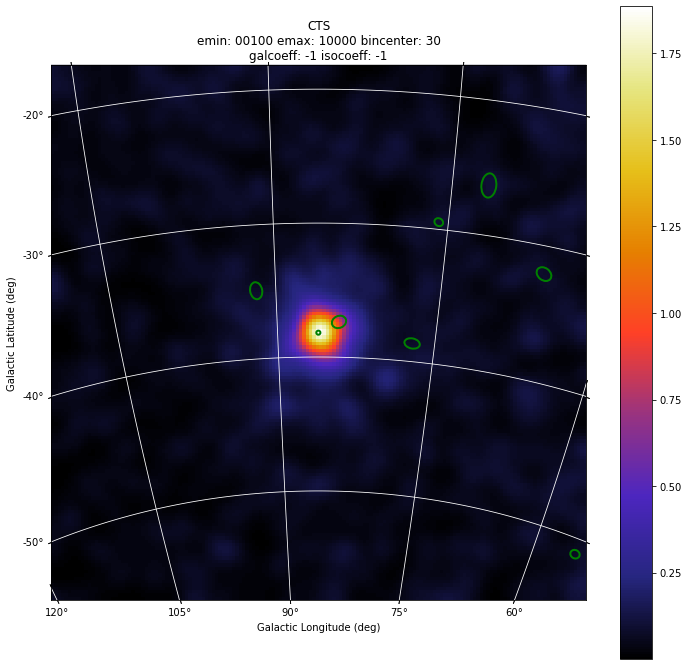

[None]

In [13]:
#Display counts map
ag.displayCtsSkyMaps(maplistFile=maplistfile, smooth=3, catalogRegions="2AGL", catalogRegionsColor="green")

2021-01-12 18:27:42,310 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


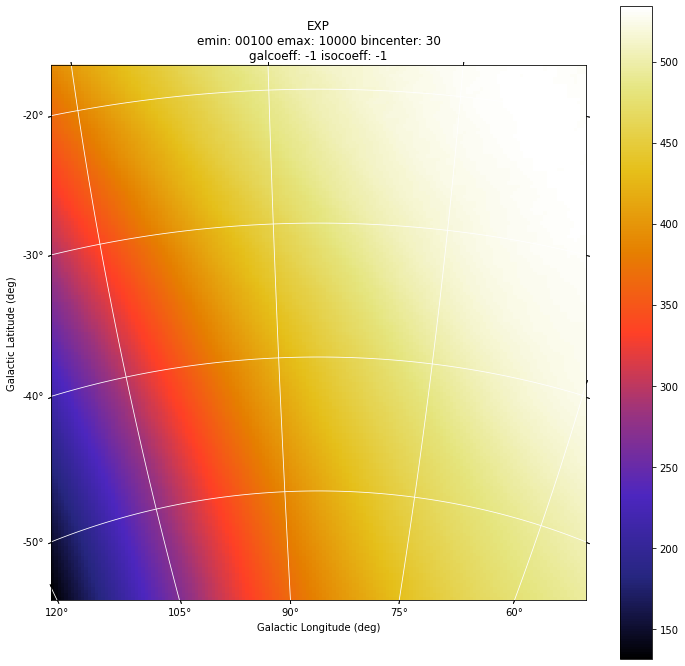

[None]

In [14]:
#Display exposure map
ag.displayExpSkyMaps()

2021-01-12 18:27:45,758 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


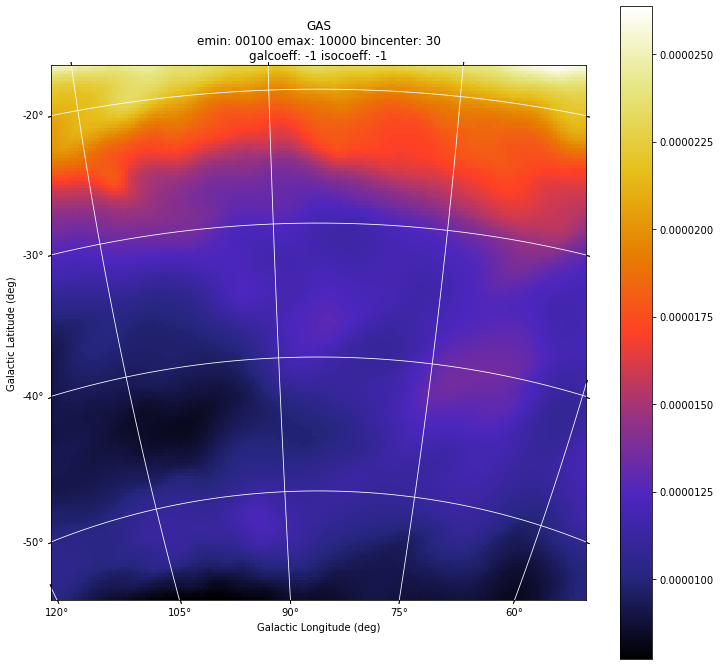

[None]

In [15]:
#Display diffuse emission map
ag.displayGasSkyMaps()

In [16]:
#Fix the diffuse emission coefficient to a default value. 
ag.setOptions(galcoeff=[0.7])

2021-01-12 18:27:49,694 [INFO    ] [MapList] Updating galactic coefficients: ['0.7']
2021-01-12 18:27:49,695 [INFO    ] [MapList] Produced: /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/analysis_product.maplist4


In [17]:
! cat $maplistfile

/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.cts.gz /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.exp.gz /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.gas.gz 30 0.7 -1


In [18]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [0.7],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [-1],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [19]:
#calculate a mean value of isotropic and diffuse emission coefficients. 
gal,iso,maplist = ag.calcBkg("2AGLJ2254+1609", galcoeff = [0.7], pastTimeWindow = 0)

2021-01-12 18:27:59,003 [INFO    ] [AGAnalysis] tmin: 216691200.000000 tmax: 217296000.000000 type: TT
2021-01-12 18:27:59,007 [INFO    ] [CtsMapGenerator] Science tool called!
2021-01-12 18:28:00,046 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.cts.gz']
2021-01-12 18:28:00,047 [INFO    ] [ExpMapGenerator] Science tool called!
2021-01-12 18:28:13,209 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.exp.gz']
2021-01-12 18:28:13,210 [INFO    ] [GasMapGenerator] Science tool called!
2021-01-12 18:28:13,800 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.gas.gz']
2021-01-12 18:28:13,802 [INFO    

In [20]:
print(iso)

[10.2492]


In [21]:
! cat $maplistfile

/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.cts.gz /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.exp.gz /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/maps/analysis_product_EMIN00100_EMAX10000_01.gas.gz 30 0.7 10.2492


In [22]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [0.7],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [10.2492],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [27]:
#Perform a maximum likelihood estimator
ag.mle()

2021-01-13 12:06:28,397 [INFO    ] [SourcesLibrary] File /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/sourceLibrary00000.txt has been produced
2021-01-13 12:06:28,435 [INFO    ] [Multi] Science tool called!
2021-01-13 12:06:32,747 [INFO    ] [AGAnalysis] AG_multi produced: ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/mle/analysis_product0000_2AGLJ2254+1609.source']
2021-01-13 12:06:32,752 [INFO    ] [SourcesLibrary] 2AGLJ2254+1609 (free) parameters update after mle: ['flux', 'pos']
2021-01-13 12:06:32,753 [INFO    ] [SourcesLibrary] 'flux' parameter has been updated: 7.50937e-07==>2.21019e-05
2021-01-13 12:06:32,754 [INFO    ] [SourcesLibrary] 'pos' parameter has been updated (86.1236, -38.1824)==>(86.0038, -38.1616)
2021-01-13 12:06:32,754 [INFO    ] [SourcesLibrary] 'dist' has been updated 0.010955734524558332==>0.08549569870416565
2021-01-13 12:06:32,755 [INFO    ] [AGAnalysis] Took 4.366925 seconds.


['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/mle/analysis_product0000_2AGLJ2254+1609.source']

In [28]:
#Display the results
ag.selectSources("sqrtTS > 0", show=True)

2021-01-13 12:06:42,629 [INFO    ] [SourcesLibrary] 
-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 39.0901
  * Position:
	- start_pos: (86.0038, -38.1616)
	- dist from (l,b): 0.0855
  * Spectrum: (PowerLaw)
	- flux: 2.21019e-05
	- index: 2.1
  * Free params: flux pos
  * Multi analysis:
	- flux(ph/cm2s): 2.21019e-05 +- 1.13263e-06
	- upper limit(ph/cm2s): 2.44331e-05
	- ergLog(erg/cm2s): 3.57202e-09 +- 1.83051e-10
	- galCoeff: [0.7]
	- isoCoeff: [10.2492]
	- exposure(cm2s): 23770200.0
	- exp-ratio: 0.0
	- L_peak: 86.0277
	- B_peak: -38.1623
	- distFromStartPos: 0.0780232
	- ellipse:
	    - L: 86.0038
	    - B: -38.1616
	    - distFromStartPos: 0.0964565
	    - r: 0.179441
	    - a: 0.179977
	    - b: 0.159673
	    - phi: 25.3088
-----------------------------------------------------------


### Light curve with default tmin and tmax

In [25]:
lightCurveData = ag.lightCurveMLE("2AGLJ2254+1609", binsize=86400)

2021-01-12 18:28:41,511 [INFO    ] [AGAnalysis] Using the tmin 216691200.0, tmax 217296000.0, timetype TT from the configuration file.
2021-01-12 18:28:41,512 [INFO    ] [AGAnalysis] [LC] Number of temporal bins: 7. tstart=216691200.000000 tstop=217296000.000000
2021-01-12 18:28:41,514 [INFO    ] [AGAnalysis] [LC] Number of processes: 1, Number of bins per process 7
2021-01-12 18:28:41,515 [INFO    ] [AGAnalysis] [LC] Analysis of temporal bin: [216691200.000000,216777600.000000] 1/7
2021-01-12 18:28:41,517 [INFO    ] [CtsMapGenerator] Science tool called!
2021-01-12 18:28:42,522 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/lc/0_bin_216691200_216777600/maps/lc_analysis_EMIN00100_EMAX10000_01.cts.gz']
2021-01-12 18:28:42,523 [INFO    ] [ExpMapGenerator] Science tool called!
2021-01-12 18:28:46,861 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/

2021-01-12 18:29:07,645 [INFO    ] [IntMapGenerator] Science tool called!
2021-01-12 18:29:07,742 [INFO    ] [AGAnalysis] Science tool intMapGenerator produced:
 ['/Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/lc/3_bin_216950400_217036800/maps/lc_analysis_EMIN00100_EMAX10000_01.int.gz']
2021-01-12 18:29:07,743 [INFO    ] [MapList] Produced: /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/lc/3_bin_216950400_217036800/lc_analysis.maplist4
2021-01-12 18:29:07,744 [INFO    ] [AGAnalysis] Maplist file created in /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/lc/3_bin_216950400_217036800/lc_analysis.maplist4
2021-01-12 18:29:07,745 [INFO    ] [AGAnalysis] Took 6.295658 seconds.
2021-01-12 18:29:07,747 [INFO    ] [SourcesLibrary] File /Users/bulgarelli/agilepy_analysis/3C454d3b_bulgarelli_20210112-182550/sourceLibrary00000.txt has been produced
2021-01-12 18:29:07,748 [INFO    ] [Multi] Science tool called!
2021-01-12 18:

OverflowError: (34, 'Result too large')

In [ ]:
cat $lightCurveData

In [ ]:
print(lightCurveData)

In [ ]:
ag.displayLightCurve("mle")

### Light curve with explicit tmin and tmax

In [ ]:
lightCurveData = ag.lightCurveMLE("2AGLJ2254+1609", tmin=55513.0, tmax=55515.0, timetype="MJD", binsize=86400)

In [ ]:
cat $lightCurveData

In [ ]:
ag.displayLightCurve("mle")

## Cleaning up

In [ ]:
ag.deleteAnalysisDir()